In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-20y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
2,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China
3,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,None,China
4,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014,Winter,Sochi,Curling,Curling Men's Curling,None,China


In [3]:
print(df.Sport.value_counts())

Athletics                    7024
Swimming                     4830
Gymnastics                   2701
Cycling                      1948
Shooting                     1685
Rowing                       1662
Cross Country Skiing         1490
Football                     1409
Biathlon                     1409
Alpine Skiing                1372
Canoeing                     1293
Hockey                       1164
Judo                         1159
Sailing                      1141
Equestrianism                1045
Handball                     1043
Wrestling                    1028
Fencing                      1023
Ice Hockey                    863
Basketball                    855
Volleyball                    853
Boxing                        849
Tennis                        826
Water Polo                    771
Weightlifting                 759
Speed Skating                 734
Table Tennis                  694
Archery                       594
Short Track Speed Skating     542
Diving        

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


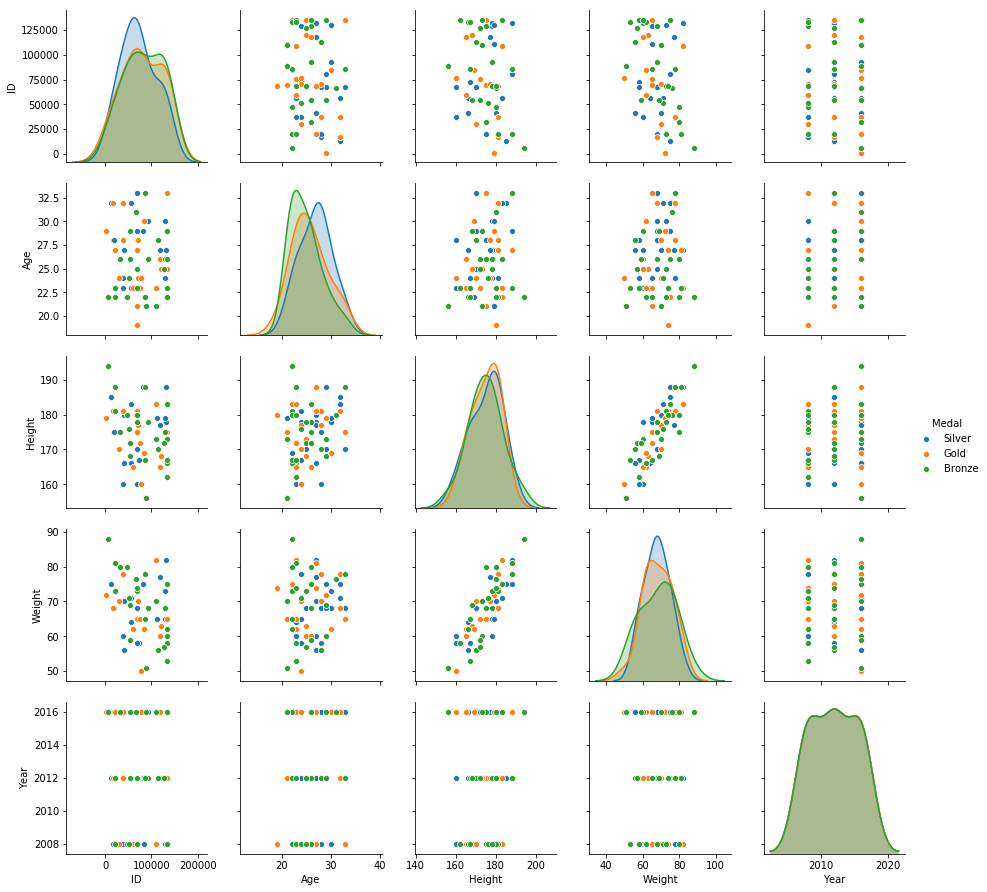

In [4]:
df2 = df.loc[(df.Sport=='Badminton') & (df.Medal!='None')]
sb.pairplot(df2, hue='Medal')

In [5]:
df = df2

x = df[['Height', 'Weight']].values
y = df['Medal'].values

std = StandardScaler()
le = LabelEncoder()

x_std = std.fit_transform(x)
y = le.fit_transform(y)

print(x_std[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[ 0.73905849 -0.03639091]
 [ 0.73905849 -0.03639091]
 [ 0.73905849  0.57803698]
 [ 1.63445628  1.5611216 ]
 [ 1.63445628  1.5611216 ]
 [-0.66799517  0.20938024]
 [ 0.73905849  1.19246487]
 [ 0.73905849  1.19246487]
 [ 0.73905849  1.19246487]
 [ 0.61114452  1.43823602]]
[2 1 0 0 1 1 2 1 1 0]


In [6]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

Accuracy: 0.136


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


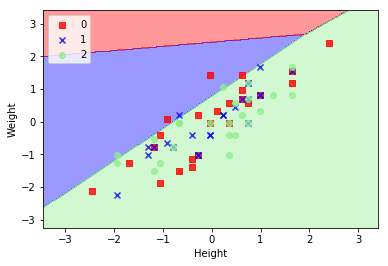

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.091


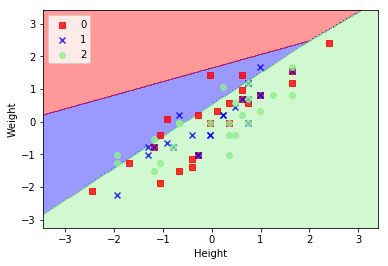

In [8]:
lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.136


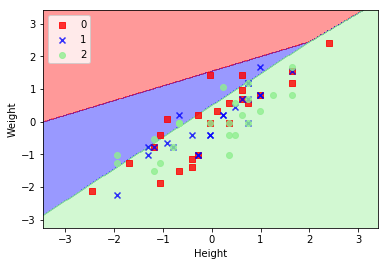

In [9]:
lr = LogisticRegression(C=50.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.136


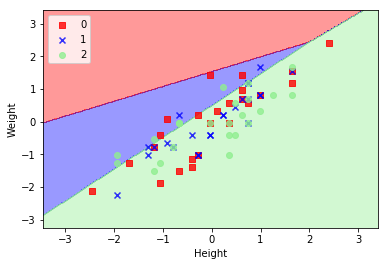

In [10]:
lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

Accuracy: 0.136


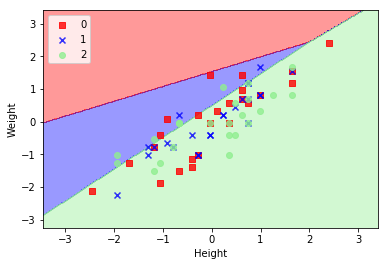

In [11]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

plot_decision_regions(x_std, y, classifier=lr)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')    
plt.show()

In [12]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[1 28.0 181.0 68.0 0 2008 0 0 0 0]
 [1 32.0 181.0 68.0 0 2012 0 1 0 0]
 [1 22.0 181.0 73.0 0 2008 0 0 0 1]
 [1 23.0 188.0 81.0 0 2012 0 1 0 1]
 [1 27.0 188.0 81.0 0 2016 0 2 0 1]
 [0 24.0 170.0 70.0 0 2008 0 0 0 3]
 [1 24.0 181.0 78.0 0 2008 0 0 0 0]
 [1 28.0 181.0 78.0 0 2012 0 1 0 0]
 [1 32.0 181.0 78.0 0 2016 0 2 0 0]
 [1 22.0 180.0 80.0 0 2008 0 0 0 2]]
[2 1 0 0 1 1 2 1 1 0]


In [13]:
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.182


In [14]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

ley = LabelEncoder()   
y = ley.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

print(x_train[:10])
print(y_train[:10])

[[-1.         -1.43420698 -2.45879075 -2.12544573  0.87906761  1.22474487
   0.          1.22474487  0.          1.55838744]
 [ 1.          0.03677454  0.99488643  0.82380813 -0.97340658  1.22474487
   0.          1.22474487  0.          0.09166985]
 [-1.          0.62516715 -1.94713487 -1.26524669  1.18781331 -1.22474487
   0.         -1.22474487  0.          0.82502865]
 [-1.         -0.25742177 -0.28425327 -1.01947553 -0.97340658  0.
   0.          0.          0.          0.82502865]
 [ 1.         -0.55161807  0.09948864  0.33226582  1.18781331 -1.22474487
   0.         -1.22474487  0.         -1.37504775]
 [-1.          2.09614866 -0.02842533 -0.40504765 -0.97340658 -1.22474487
   0.         -1.22474487  0.          1.55838744]
 [ 1.          0.33097084  1.63445628  1.5611216  -0.97340658  1.22474487
   0.          1.22474487  0.         -0.64168895]
 [-1.          0.03677454 -0.02842533 -0.03639091 -0.97340658 -1.22474487
   0.         -1.22474487  0.          0.82502865]
 [-1.   

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
%%time
lr = LogisticRegression(C=100.0, random_state=5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.273
CPU times: user 2.22 ms, sys: 1.35 ms, total: 3.56 ms
Wall time: 2.08 ms


In [16]:
%%time
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.273
CPU times: user 16.5 ms, sys: 2.61 ms, total: 19.1 ms
Wall time: 17.1 ms


In [17]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.318
CPU times: user 101 ms, sys: 5.04 ms, total: 106 ms
Wall time: 104 ms


In [18]:
%%time
lr = LogisticRegression(solver='saga')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.318
CPU times: user 5.72 ms, sys: 2.04 ms, total: 7.76 ms
Wall time: 6.01 ms


In [19]:
%%time
lr = LogisticRegression(max_iter=100, solver='saga', penalty='l1')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.364
CPU times: user 4.68 ms, sys: 2.14 ms, total: 6.82 ms
Wall time: 5.02 ms


In [20]:
%%time
lr = LogisticRegression(solver='sag')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.318
CPU times: user 4.76 ms, sys: 1.8 ms, total: 6.56 ms
Wall time: 5.03 ms


In [21]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)

c = np.array([0.1, 1, 10, 100])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_solver,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,newton-cg,0.008511,0.000220,0.534722,0.222222,11
1,0.1,lbfgs,0.004439,0.000201,0.534722,0.222222,11
2,0.1,liblinear,0.000500,0.000186,0.541667,0.208333,20
3,0.1,sag,0.001506,0.000195,0.534722,0.222222,11
4,0.1,saga,0.001472,0.000193,0.534722,0.222222,11
5,1,newton-cg,0.009682,0.000187,0.555556,0.222222,11
6,1,lbfgs,0.006121,0.000168,0.555556,0.222222,11
7,1,liblinear,0.000457,0.000169,0.548611,0.222222,11
8,1,sag,0.001844,0.000171,0.555556,0.222222,11
9,1,saga,0.002256,0.000173,0.555556,0.222222,11


In [22]:
df = pd.read_csv('prepd-data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.61549745 -0.25245155  0.42402653  0.6507647  -1.06542753  0.45633602
  -0.4675028  -1.19092679 -1.06341198 -0.98195753]
 [ 0.61549745 -0.41153166 -0.61940473 -0.88757195 -1.06542753  1.12558717
  -0.4675028  -0.19382838  0.17381329  0.15427521]
 [ 0.61549745 -0.57061176  0.63271279  0.26618054 -1.06542753  0.72403648
  -0.4675028   1.55109383 -0.80565672 -0.83396083]
 [ 0.61549745 -0.09337144 -1.66283599 -0.73373829 -1.06542753  0.85788671
  -0.4675028  -1.35710986  1.87499803  1.83475388]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.45282691]
 [-1.62470211 -1.84325263 -0.82809098 -1.34907295 -1.06542753  1.2594374
  -0.4675028   0.63708696  1.30793645  1.47669734]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.1950262 ]
 [ 0.61549745 -0.57061176  0.21534028  0.03543004 -1.06542753  0.92481183
   2.1390246   1.7172769   1.2563854   1.17592985]
 [

In [23]:
grid = GridSearchCV(estimator=lr, param_grid=dict(C=c, solver=solver))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_solver', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(20)

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


KeyboardInterrupt: 